In [1]:
from datetime import datetime
from reference.Strategy import BaseStrategyFrame
from reference.Strategy import zwpy_sta
import pathlib
import backtrader as bt
import pyfolio as pf

BTC_data = pathlib.Path().cwd() / "BTC_hour.csv"


cerebro = bt.Cerebro()
cerebro.addstrategy(zwpy_sta.MacdV2Strategy)
cerebro.broker.setcash(100000)

Starting Value: 152852.72
printlog: False
period_me1: 12
period_me2: 26
period_signal: 9
=== Backtesting Start! ===
=== Backtesting Finished! ===
Ending Value: 152852.72


<IPython.core.display.Javascript object>


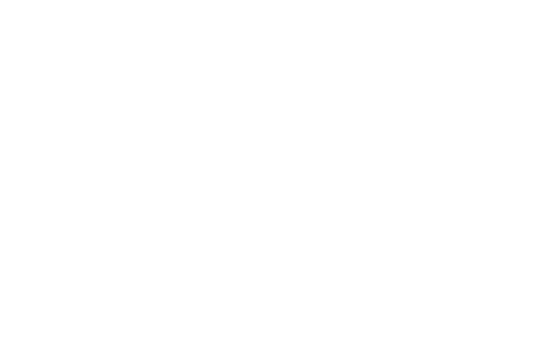

[[<Figure size 432x288 with 11 Axes>]]

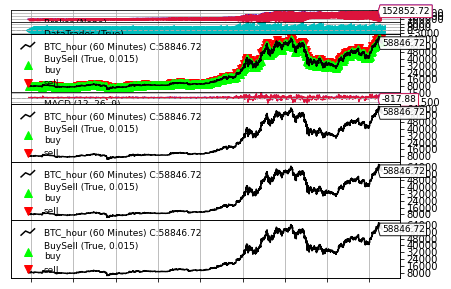

In [6]:
dt_start = datetime.strptime("20190925","%Y%m%d")
dt_end = datetime.strptime("20211028","%Y%m%d")
data = bt.feeds.GenericCSVData(
    timeframe = bt.TimeFrame.Minutes,
    compression = 60,
    dataname=BTC_data,
    fromdate=dt_start,      
    todate=dt_end,
    nullvalue=0.0,
    dtformat=('%Y-%m-%d %H:%M:%S'),   
    datetime=0,             # 各列的位置，从0开始，如列缺失则为None，-1表示自动根据列名判断
    open = 1,
    high = 2,
    low = 3,
    close = 4,
    openinterest=-1,
    volume = -1
)
cerebro.adddata(data)
print('Starting Value: %.2f' % cerebro.broker.getvalue())
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
results = cerebro.run()
print('Ending Value: %.2f' % cerebro.broker.getvalue())
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
cerebro.plot()

Start date,2019-09-25
End date,2021-10-28
Total months,36
,Backtest
Annual return,15.001%
Cumulative returns,52.853%
Annual volatility,9.15%
Sharpe ratio,1.57
Calmar ratio,2.13
Stability,0.87
Max drawdown,-7.04%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.04,2021-03-15,2021-04-27,2021-08-21,115
1,4.82,2021-01-14,2021-02-01,2021-02-08,18
2,4.31,2021-02-22,2021-02-28,2021-03-05,10
3,2.57,2021-08-23,2021-09-01,2021-10-06,33
4,2.48,2021-01-07,2021-01-13,2021-01-14,6


<IPython.core.display.Javascript object>


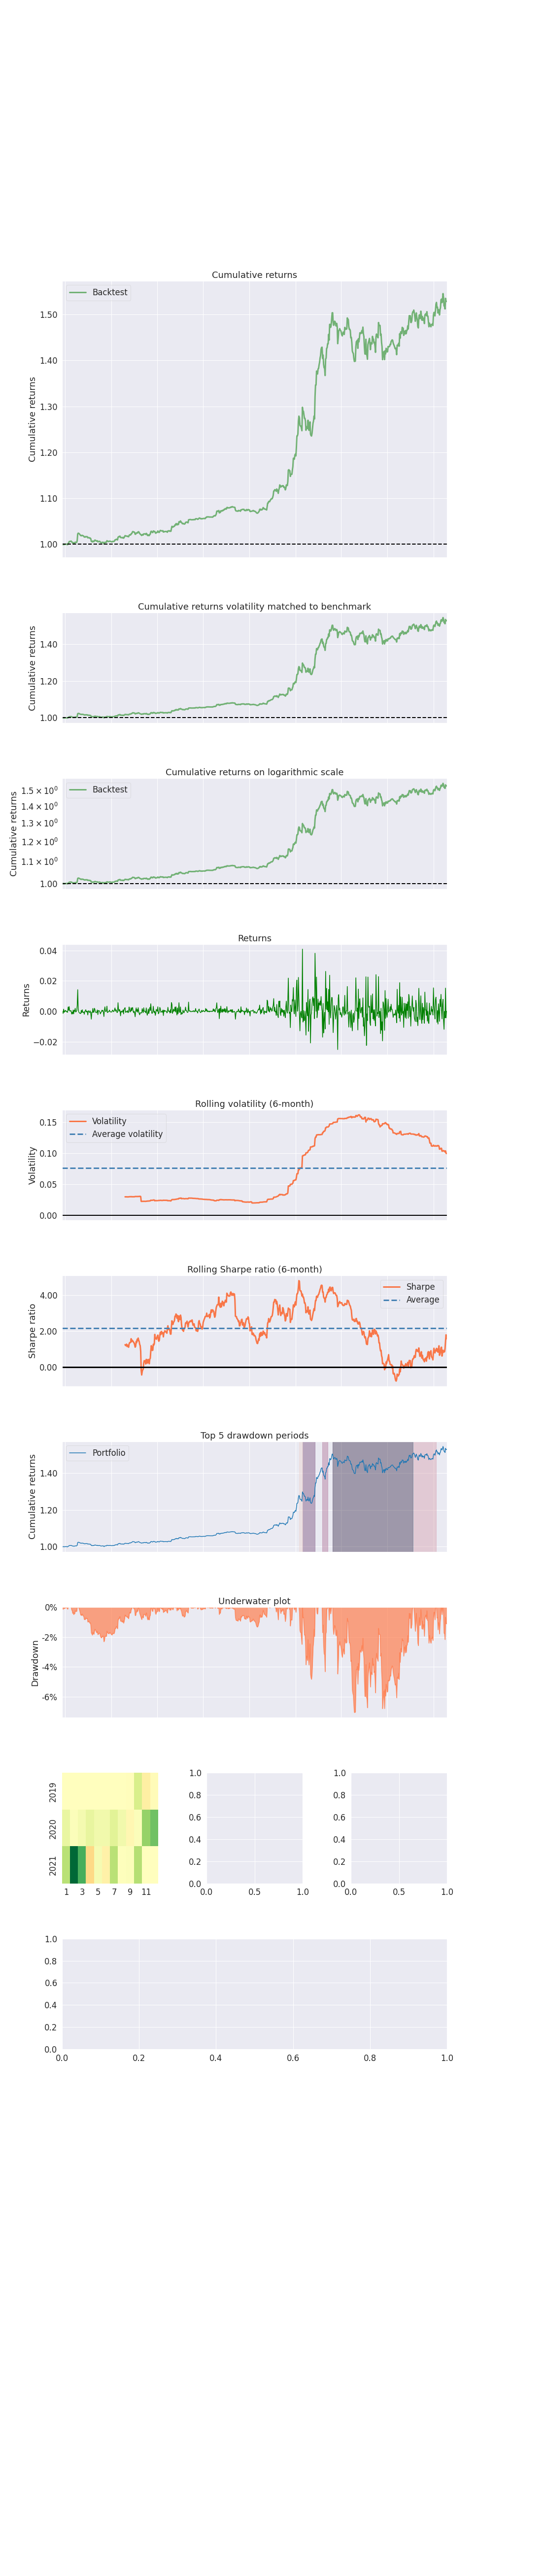

/home/thomas/Desktop/BTC/env/lib/python3.8/site-packages/pyfolio/timeseries.py:1230: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


Stress Events,mean,min,max
New Normal,0.06%,-2.52%,4.09%


<IPython.core.display.Javascript object>


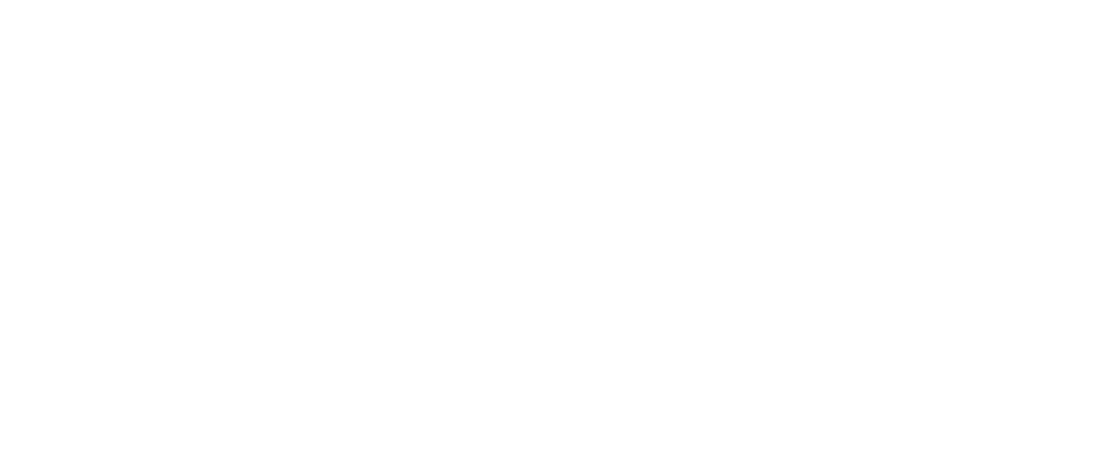

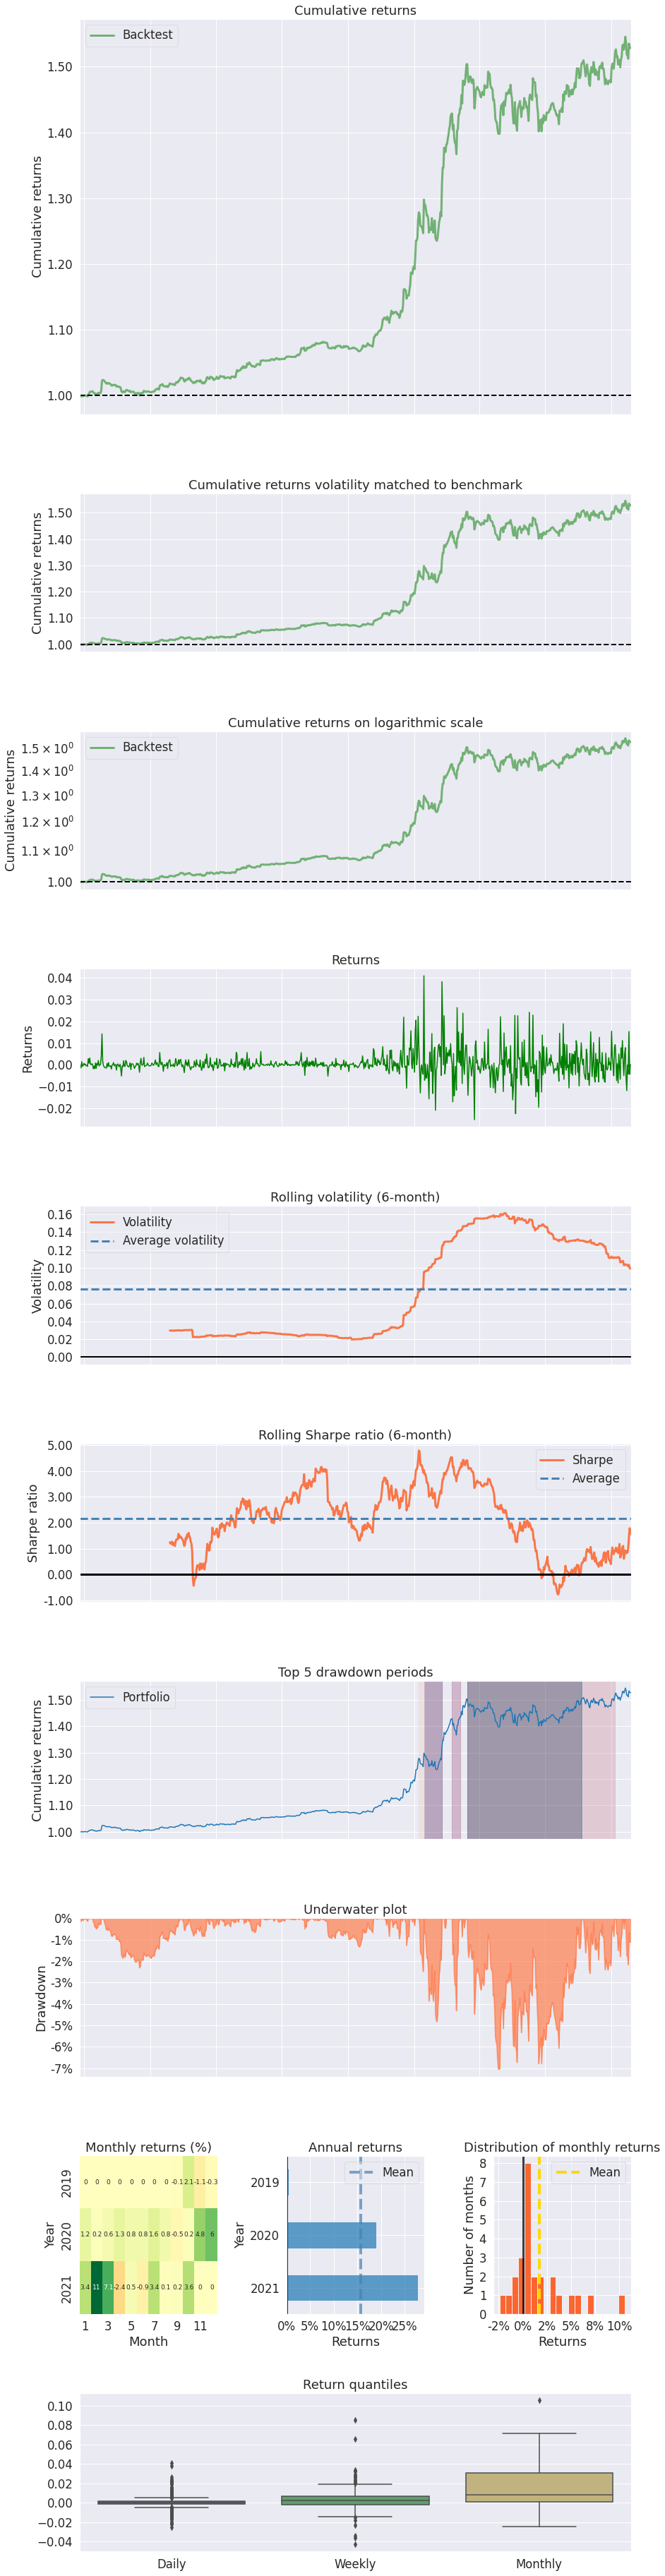

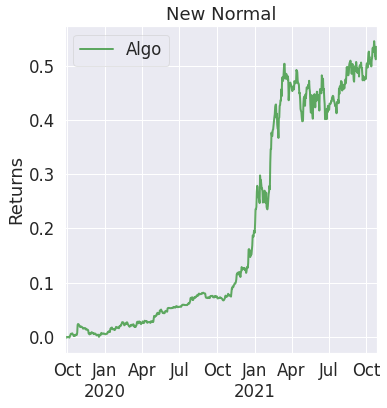

In [3]:
pf.create_full_tear_sheet(returns)